<a href="https://colab.research.google.com/github/Smpests/KeepLearning/blob/master/jupyter-notebook/ml/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree（决策树）

In [7]:
# 一组喜剧演员的数据，模型目标是预测某人是否会去看他的表演
!echo -e "Age,Experience,Rank,Nationality,Go\n36,10,9,UK,NO\n42,12,4,USA,NO\n23,4,6,N,NO\n52,4,4,USA,NO\n43,21,8,USA,YES\n44,14,5,UK,NO\n66,3,7,N,YES\n35,14,9,UK,YES\n52,13,7,N,YES\n35,5,9,N,YES\n24,3,5,USA,NO\n18,3,7,UK,YES\n45,9,9,UK,YES\n" > data.csv
!cat data.csv

Age,Experience,Rank,Nationality,Go
36,10,9,UK,NO
42,12,4,USA,NO
23,4,6,N,NO
52,4,4,USA,NO
43,21,8,USA,YES
44,14,5,UK,NO
66,3,7,N,YES
35,14,9,UK,YES
52,13,7,N,YES
35,5,9,N,YES
24,3,5,USA,NO
18,3,7,UK,YES
45,9,9,UK,YES



    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1
大于6.5： [0]
小于6.5： [0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


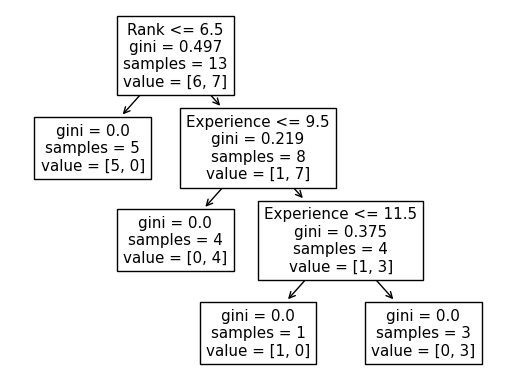

In [15]:
# load
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
# 决策树所有输入应该是数字，所以要将非数字的列值进行转换

_nation_map = {"UK": 0, "USA": 1, "N": 2}
_go_map = {"NO": 0, "YES": 1}
df["Nationality"] = df["Nationality"].map(_nation_map)
df["Go"] = df["Go"].map(_go_map)
print(df)

# 将特征列和目标列分开（x和y）
features = ["Age", "Experience", "Rank", "Nationality"]
X = df[features]
y = df["Go"]

# 创建决策树
dtree = DecisionTreeClassifier()
# 填充测试数据
dtree = dtree.fit(X, y)
# 绘图
tree.plot_tree(dtree, feature_names=features)
"""
图中各项指标解释：
1.Rank <= 6.5，表示Rank低于6.5的演员将走左树（True），否则走右树（False）
2.gini = 0.497，gini是split（样本分割）的quality(质量)，取值范围[0.0, 0.5]。
注①：0.0表示所有样本得到相同的结果，而0.5表示spit恰好在中间（个人理解是说有50%的数据是满足1.的条件的）
注②：分割样本的方法有很多种，在这里使用了gini，公式：Gini = 1 - (x/n)² + (y/n)²。
x是"GO"的数量，y是"NO"的数量，n是样本数量
3.samples = 13，表示在做出这层决策时还有13位演员可选；
4.values = [6, 7]，表示在3.中的13位演员中，有6位的数据会得到"NO"（y值），7位得到"GO"
"""

# 使用决策树来预测是否应该去看一个演员的节目
# 从上面的分析和绘制的决策树，第一层Rank6.5是分水岭，因此我们看一下7和6的结果
print("大于6.5：", dtree.predict([[40, 10, 7, 1]]))
print("小于6.5：", dtree.predict([[40, 10, 6, 1]]))

# 多次运行上述代码，发现结果会变化。因为决策树不会100%确定答案，基于结果发生的概率答案会有所不同。
# 上述说明等于是说0和1各自有权重，即使0的权重小概率低，运行次数多之后，也会出现0的答案。

# Confusion Matrix（混淆矩阵）
什么是混淆矩阵？

它是一个用于分类问题的表格，用于评估模型中出现错误的位置。

这些行代表结果应该属于的实际类别。而列代表我们所做的预测。使用此表很容易看出哪些预测是错误的。

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

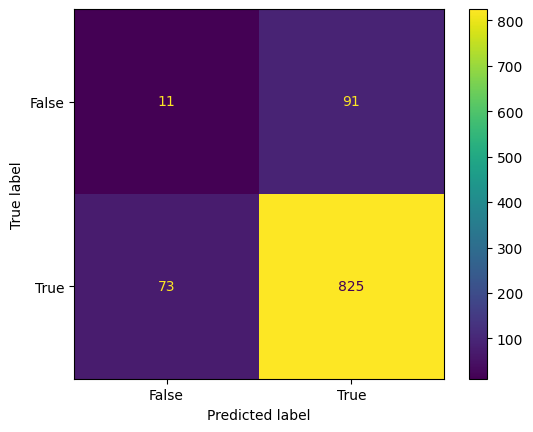

准确率： 0.836
精确率： 0.9006550218340611
召回率： 0.9187082405345212
特异性： 0.10784313725490197
F1_score： 0.9095920617420067


In [31]:
import numpy as np
from sklearn import metrics

# 生成实际值和预测值

# binomial(试验次数, 每次发生的概率, shape)
# 在以下1000个样本中，0.9的正例、0.1的负例
actual = np.random.binomial(1, 0.9, size=1000)
predicted = np.random.binomial(1, 0.9, size=1000)
print(actual)

# 创建混淆矩阵
confusion_matrix = metrics.confusion_matrix(actual, predicted)
# 为了创建更易于解释的视觉显示，我们需要将表格转换为混淆矩阵显示。
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# 可视化
import matplotlib.pyplot as plt

cm_display.plot()
plt.show()

"""
图中指标解释：
1.混淆矩阵分为四个象限（从左到右、从上到下）：真阴性、假阳性、假阴性、真阳性
2.True表示准确预测值，False表示存在错误或错误预测。（个人理解就是测试集和验证集的结果是否能对上）
3.该矩阵提供了不同的衡量标准，包括：准确率（Accuracy）、精确率/查准率(Precision)、灵敏度（召回率/查全率）、特异性（Specificity）和 F 分数(F-scor)。
"""

# 计算准确率: (真阳性+真阴性)/总预测，即主对角线求和除以总数，评估预测正确的不管正负例。
Accuracy = metrics.accuracy_score(actual, predicted)
print("准确率：", Accuracy)

# 计算精确率：真阳性/（真阳性+假阳性），个人理解是评估正例中的准确率
Precision = metrics.precision_score(actual, predicted)
print("精确率：", Precision)

# 正例（阳性）：带有麋鹿的图片，二元目标是识别图片上是否是麋鹿
# 负例（阴性）：带有考拉的图片。
# 真阴性：带有考拉的图片被标记为麋鹿，模型也预测是麋鹿，虽然预测正确，但是负例。
# 假阴性：带有考拉的图片被标记为麋鹿，而模型预测不是麋鹿。

# 召回率：真阳性/（真阳性+假阴性），根据上面的分析个人理解召回率是在正例中正确预测的除以实际正确的总数（包含负例），因为负例不是目标就不做分子
Sensitivity_recall = metrics.recall_score(actual, predicted)
print("召回率：", Sensitivity_recall)

# 特异性：真阴性/(真阴性+假阳性)，和recall相反,越低越好
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print("特异性：", Specificity)

# F-score:是精确率和召回率的调和参数。
# 高召回率的情况下，精确率会有所下降（假阳性少，即多数负例的预测和实际情况相反，即误识别考拉为麋鹿）
# 高精确率的情况下，召回率会有所下降（假阳性多，即多数负例的预测和实际情况相同，即假阴性增多，在如垃圾邮件标记不能将重要的邮件标记为垃圾）

# 公式：2*（（精确率*召回率）/（精确率+召回率）），越大越好，但是要验证模型的泛化能力，可能数据过拟合在测试数据表现好，使用新数据将表现很差
F1_score = metrics.f1_score(actual, predicted)
print("F1_score：", F1_score)


# Hierarchical Clustering（层次聚类）
层次聚类是一种用于聚类数据点的无监督学习方法。该算法通过测量数据之间的差异来构建聚类。无监督学习意味着模型不需要训练，我们不需要“目标”变量。此方法可用于任何数据，以可视化和解释各个数据点之间的关系。

自下而上的层次聚类，将每个数据点视为其自己的聚类，然后将距离在一定范围内（最短）的聚类连接在一起形成一个更大的聚类，重复直到形成一个包含所有数据点的聚类。

因此在层次聚类中，重要的是决定距离和连接方式。

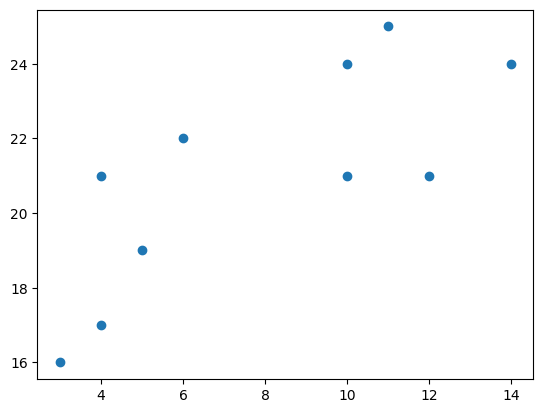

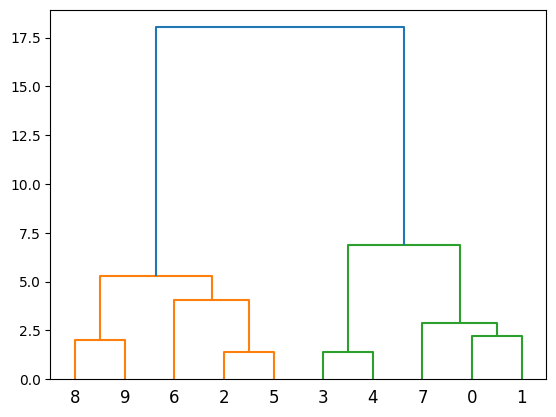

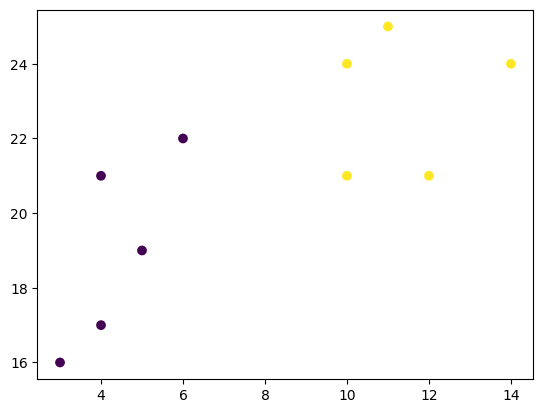

In [36]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 创建一些数据点
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

data = list(zip(x, y))

# 使用scipy
# 欧式距离(欧几里得距离度量)和Ward的连接方式，试图最小化聚类之间的方差
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

# 使用sklearn
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
# 填充数据点数据
labels = hierarchical_cluster.fit_predict(data)

# 不同颜色表示不同的聚类
plt.scatter(x, y, c=labels)
plt.show()

# Logistic Regression（逻辑回归）
逻辑回归旨在解决分类问题。它通过预测分类结果来做到这一点，这与预测连续结果的线性回归不同。

在最简单的情况下，有两个结果，称为二项式，例如预测肿瘤是恶性还是良性。其他情况有两个以上的结果要分类，在这种情况下称为多项式。

在这里，我们将使用基本逻辑回归来预测二项式变量。这意味着它只有两种可能的结果。

In [53]:
import numpy
from sklearn import linear_model

# 场景：X肿瘤大小，y是否患病
# 自变量X，需reshape成一个二维数组才可作为逻辑回归函数的参数
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
# 因变量y
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
# 填充数据
logr.fit(X, y)
# 预测
predicted = logr.predict(numpy.array([3.46]).reshape(-1, 1))
print(predicted)

# 系数是X每单位的变化对y的预期变化,exp计算的是e的x次方=y
print("Coefficient(系数)：", numpy.exp(logr.coef_))
# 结果是4.03，表示每增大1mm,患病的几率增加4倍

# coefficient和intercept用于找出每个肿瘤癌变的概率
def logit2prob(logr, x):
  # 以下不是很懂，目前我仅当成套路，只需要记住输入输出
  # 计算对数可能性
  log_odds = logr.coef_ * x + logr.intercept_
  # 计算可能性
  odds = numpy.exp(log_odds)
  # 计算概率
  probability = odds / (1 + odds)
  return (probability)

print(logit2prob(logr, X))

[0]
Coefficient(系数)： [[4.03541657]]
[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


# Grid Search（网格搜索）
大多数机器学习模型都包含可以调整以改变模型学习方式的参数。例如，逻辑回归模型，来自sklearn，有一个C控制正则化的参数，它会影响模型的复杂性。

较高的值C告诉模型，训练数据类似于真实世界的信息，对训练数据施加更大的权重。而较低的值则C相反。

我们如何选择最佳价值C？最佳值取决于用于训练模型的数据。

一种方法是尝试不同的值，然后选择给出最佳分数的值。这种技术称为网格搜索。如果我们必须为两个或更多参数选择值，我们将评估值集的所有组合，从而形成值网格。

In [57]:
from sklearn import datasets

# 加载数据集（鸢尾花数据集）
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

# 逻辑回归模型
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter = 10000)

# 填充数据
print(logit.fit(X, y))
# 评估方法，输出准确率
print(logit.score(X, y))

# 逻辑回归模型的控制参数C，默认值为1，以下试验不同C值的结果
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))
print(scores)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Preprocessing - Categorical Data(数据分类)
当您的数据具有由字符串表示的类别时，将很难使用它们来训练通常只接受数字数据的机器学习模型。

您可以转换数据，以便在您的模型中使用，而不是无视那些有用的数据。

In [59]:
!echo -e "Car,Model,Volume,Weight,CO2\nToyoty,Aygo,1000,790,99\nMitsubishi,Space Star,1200,1160,95\nSkoda,Citigo,1000,929,95\nFiat,500,900,865,90\nMini,Cooper,1500,1140,105\nVW,Up!,1000,929,105\nSkoda,Fabia,1400,1109,90\nMercedes,A-Class,1500,1365,92\nFord,Fiesta,1500,1112,98\nAudi,A1,1600,1150,99\nHyundai,I20,1100,980,99\nSuzuki,Swift,1300,990,101\nFord,Fiesta,1000,1112,99\nHonda,Civic,1600,1252,94\nHundai,I30,1600,1326,97\nOpel,Astra,1600,1330,97\nBMW,1,1600,1365,99\nMazda,3,2200,1280,104\nSkoda,Rapid,1600,1119,104\nFord,Focus,2000,1328,105\nFord,Mondeo,1600,1584,94\nOpel,Insignia,2000,1428,99\nMercedes,C-Class,2100,1365,99\nSkoda,Octavia,1600,1415,99\nVolvo,S60,2000,1415,99\nMercedes,CLA,1500,1465,102\nAudi,A4,2000,1490,104\nAudi,A6,2000,1725,114\nVolvo,V70,1600,1523,109\nBMW,5,2000,1705,114\nMercedes,E-Class,2100,1605,115\nVolvo,XC70,2000,1746,117\nFord,B-Max,1600,1235,104\nBMW,216,1600,1390,108\nOpel,Zafira,1600,1405,109\nMercedes,SLK,2500,1395,120\n" > car.csv

In [69]:
# 数据分类

import pandas as pd

cars = pd.read_csv("car.csv")

# 数据中包含不是数字的列，也无法确定它们和其它数值列的线性关系。
# 下面我们使用One Hot Encoding独热码（长度为总特征数量，1为当前对象命中的特征）来转化这些列

# get_dummies()函数可以进行One Hot Encoding
ohe_cars = pd.get_dummies(cars[["Car"]])
print(ohe_cars)

X = pd.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
print(predictedCO2)

# 在下面只有两种情况的时候，可以使用0和1表示非红色和红色，仅需要1列
colors = pd.DataFrame({'color': ['blue', 'red']})

# drop_first删除第一列
dummies = pd.get_dummies(colors, drop_first=True)

print(dummies)

# 非二元可以描述的场景
colors = pd.DataFrame({'color': ['blue', 'red', 'green']})
dummies = pd.get_dummies(colors, drop_first=True)
dummies['color'] = colors['color']

print(dummies)

    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  \
0          0        0         0         0          0           0            0   
1          0        0         0         0          0           0            0   
2          0        0         0         0          0           0            0   
3          0        0         1         0          0           0            0   
4          0        0         0         0          0           0            0   
5          0        0         0         0          0           0            0   
6          0        0         0         0          0           0            0   
7          0        0         0         0          0           0            0   
8          0        0         0         1          0           0            0   
9          1        0         0         0          0           0            0   
10         0        0         0         0          0           0            1   
11         0        0       

# K-means（均值K）
K-means 是一种用于聚类数据点的无监督学习方法。该算法通过最小化每个簇中的方差将数据点迭代划分为 K 个簇。

使用eblow方法估计 K 的最佳值，然后使用 K-means聚类将数据点分组到聚类中。

该分类器将每个数据点随机分配到K个聚类中的一个。然后，计算每个聚类的中心，数据点将重新分配给最接近中心的聚类。重复上述过程，直到聚类不再发生变化。

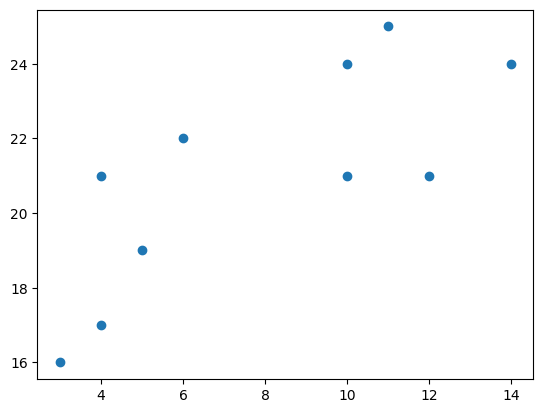

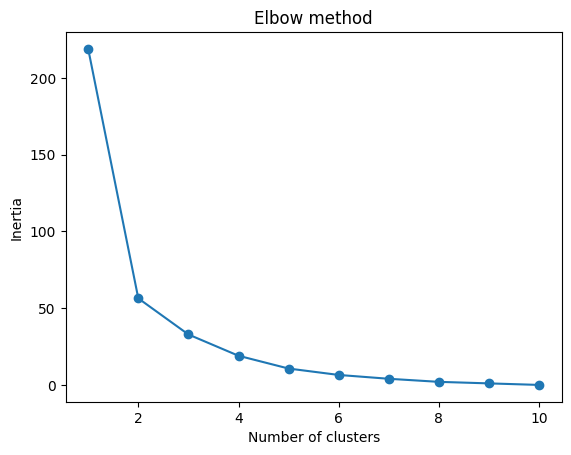

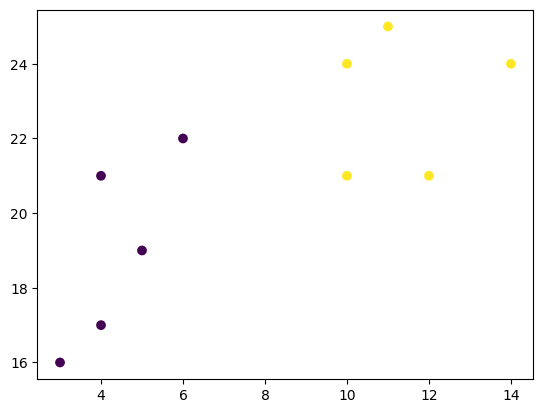

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

data = list(zip(x, y))
inertias = []

# 因为数据点只有10个，所以簇数量最大为10，下面循环枚举K值
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 观察图像看到elbow在K=2处时，变得更加平滑，因此设置C=2重新拟合数据
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# Bootstrap Aggregation（Bagging套袋法、随机森林）
优化决策树在训练集上过度拟合的短板

In [77]:
# 任务：识别不同类别的葡萄酒

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# as_frame参数为True时不会丢失特征名称
data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

# 将数据分成训练集和测试集，test_size指定了测试集数据量占总数的比值
# random_state的值是随意的，在不同的地方调用，数据集不变的条件下只要该值相同，就能分割出相同的训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)
dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# 模型评估
print("Train Accuracy（训练集准确率）：", accuracy_score(y_train, dtree.predict(X_train)))
print("Test Accuracy（测试集准确率）：", accuracy_score(y_test, y_pred))

Train Accuracy（训练集准确率）： 1.0
Test Accuracy（测试集准确率）： 0.8222222222222222


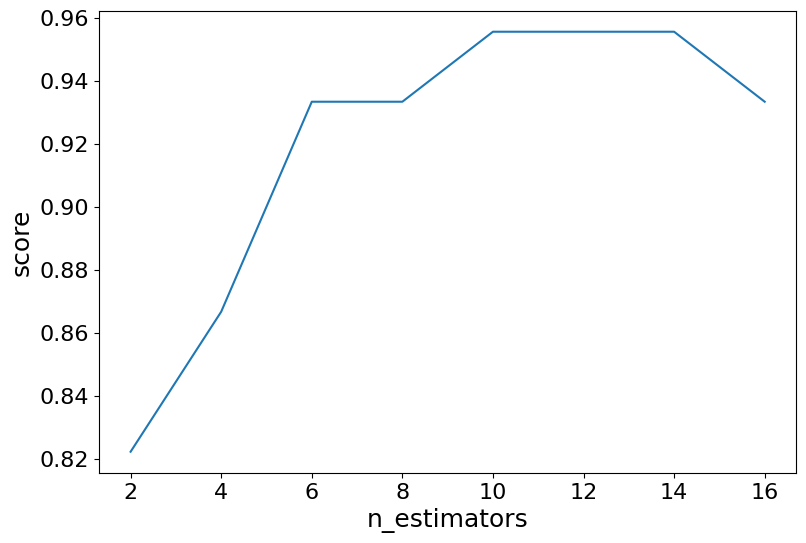

In [78]:
# 上面的基础分类器性能还行，下面看看Bagging的效果
from sklearn.ensemble import BaggingClassifier

# 设置可能的参数值变化，用于下方循环
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
# 设置图形宽高
plt.figure(figsize=(9, 6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [79]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

# random_state还是22，说明训练集和测试集不变
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# n_estimators=12是上一个试验中得到的最佳值
oob_model = BaggingClassifier(n_estimators = 12, oob_score = True, random_state = 22)

oob_model.fit(X_train, y_train)
# 另一种评估指标
print("out-of-bag score", oob_model.oob_score_)

0.9398496240601504


[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

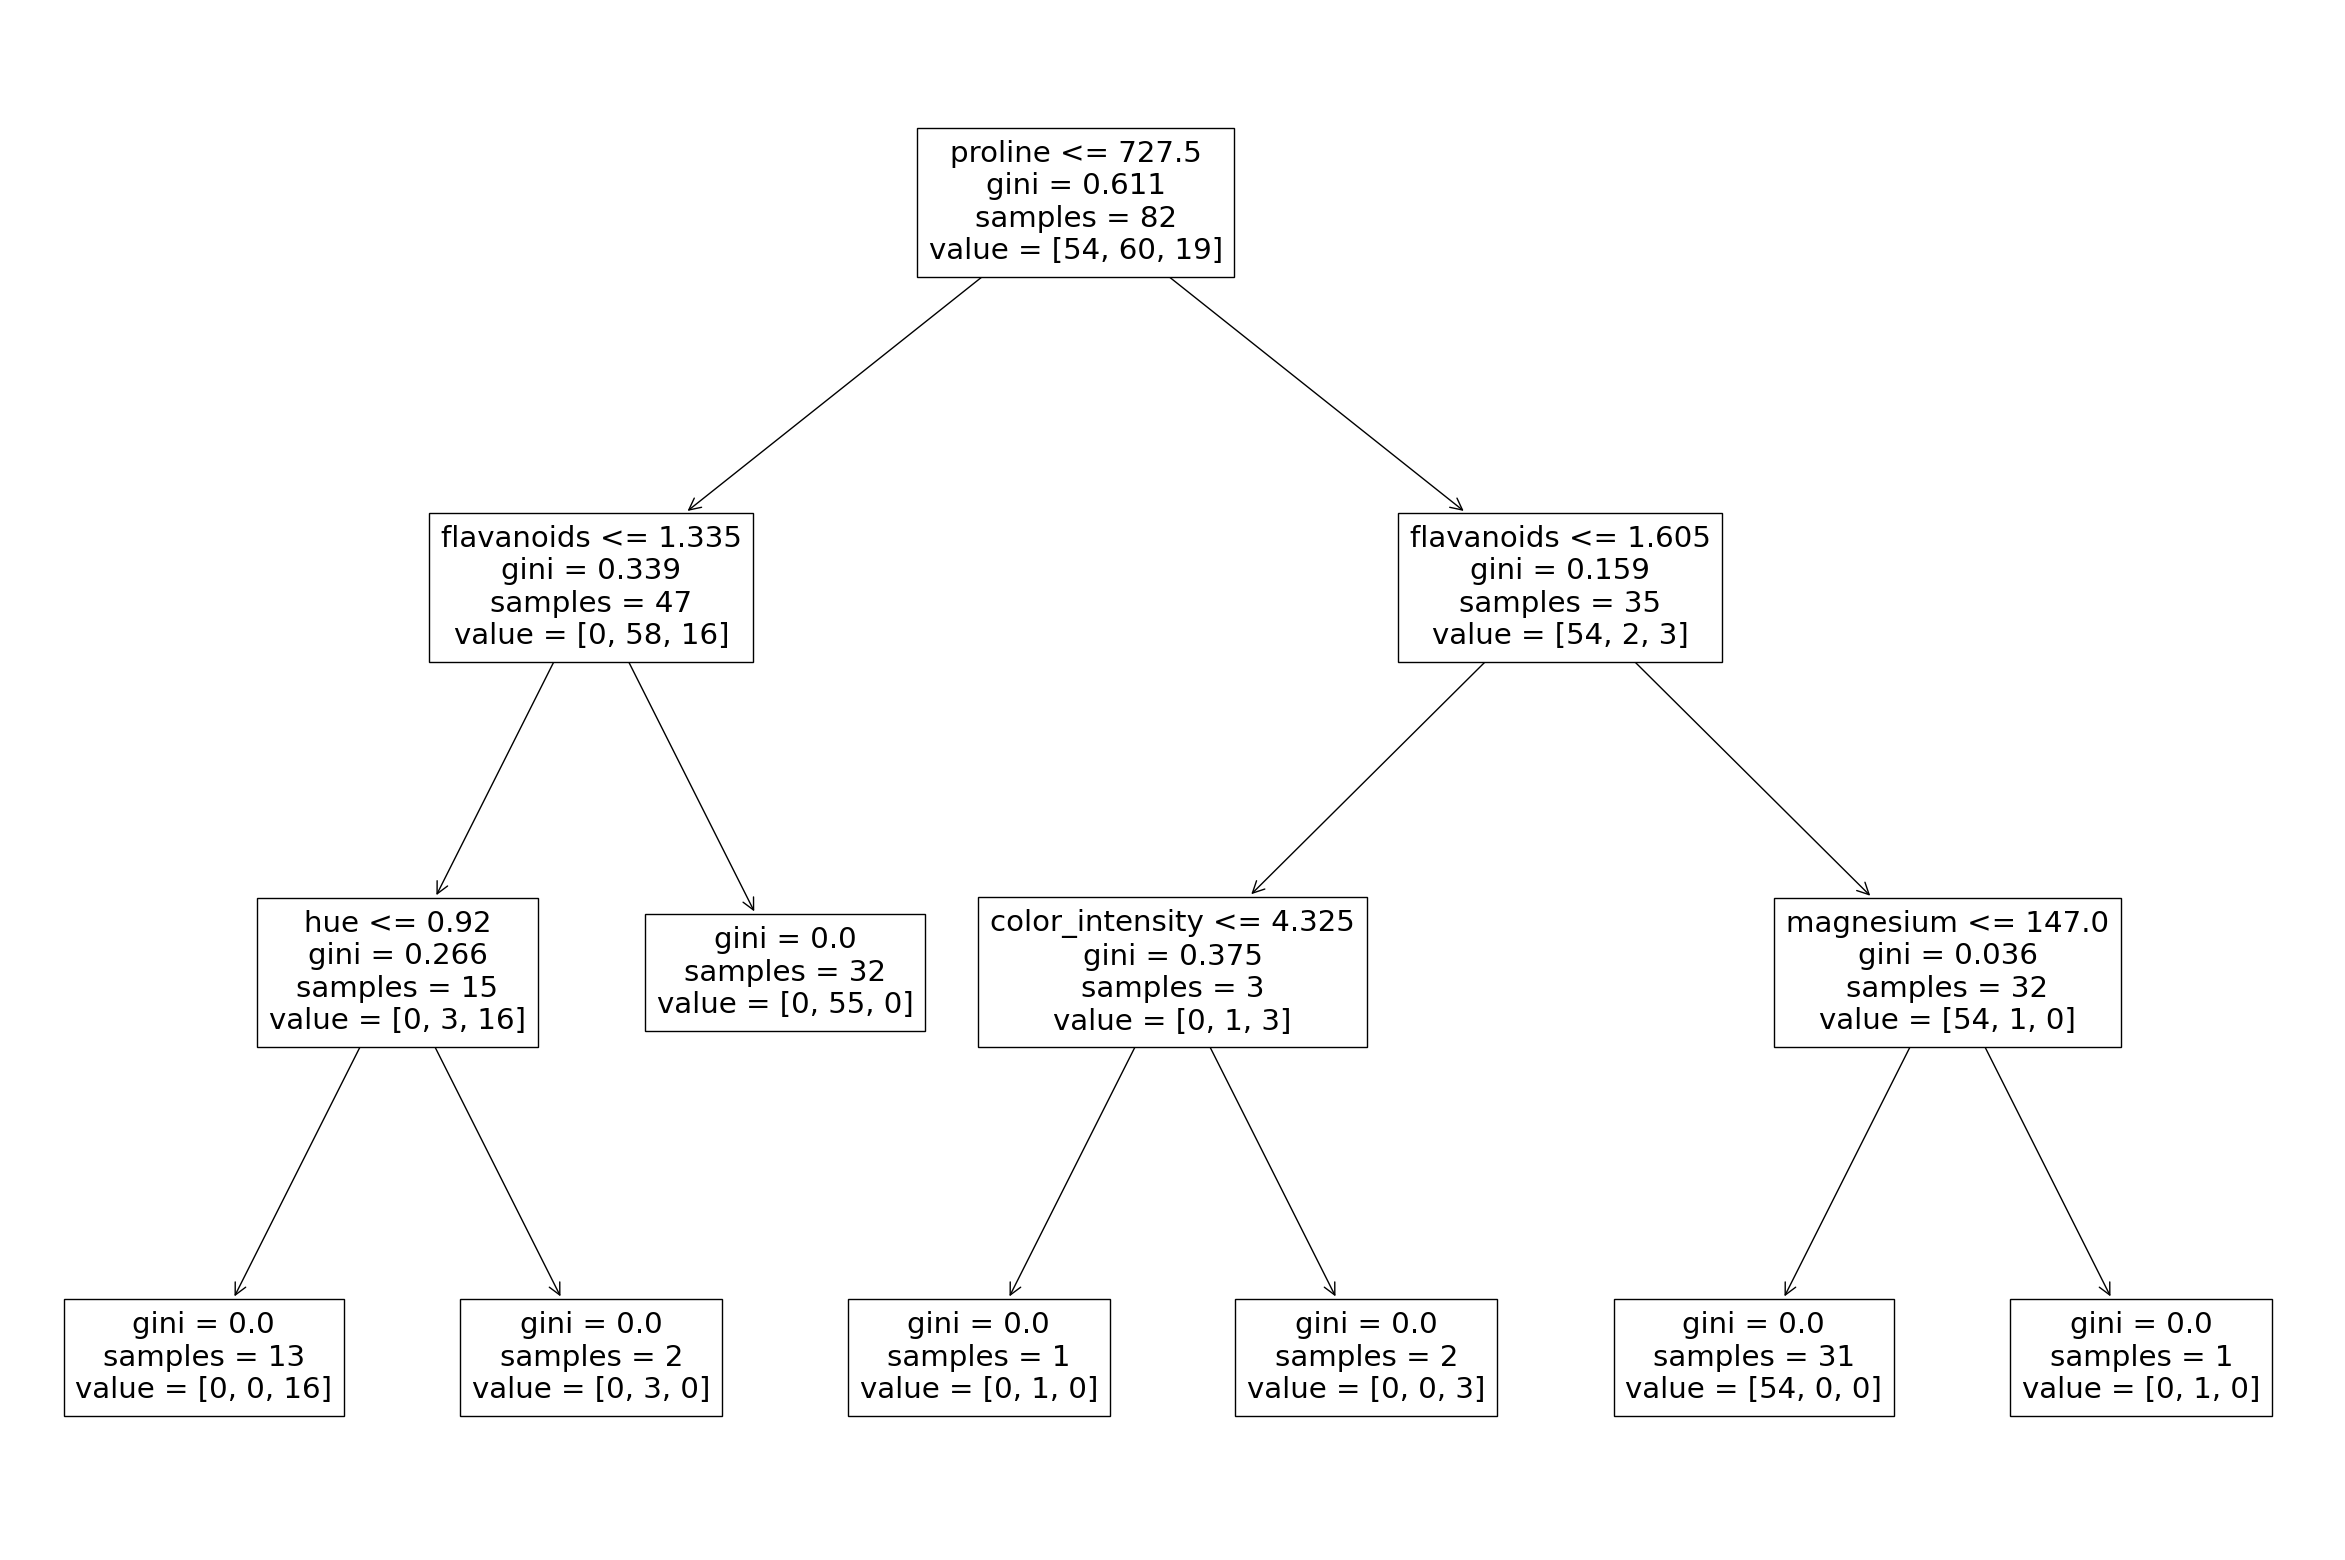

In [84]:
# 使用Bagging生成决策树

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

# 设置图形宽高
plt.figure(figsize=(30, 20))

# 通过更改clf.estimators_[index]中的索引，可以看到每一棵决策树（多棵树的预测结果进行多数投票）
plot_tree(clf.estimators_[0], feature_names = X.columns)

# Cross Validation（交叉验证）


In [95]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

# K-fold方法：训练数据被分成k个较小的集合，用于验证模型。然后在k-1倍的训练集上训练数据，然后剩余的数据集用作验证集来评估模型。

# 示例是对不同种类的鸢尾花分类，分类器使用决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit

clf = DecisionTreeClassifier(random_state=42)

# 分成5个集合
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)
# 可以对所有分数求平均来评估整体表现

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Stratified K-Fold方法：在数据不平衡（某类数据多某类数据少）情况下，使用该方法将会使所有类别在多个集合中的占比相同。
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Leave-One-Out(LOO)方法：循环遍历使用一个数据来验证，其余数据来训练。
loo = LeaveOneOut()
scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Leave-P-Out(LPO)：和LOO的差别仅仅是我们能够选择p个数据作为验证集
# 速度较慢：因为150个数据在p=2时两两组合C(150,2)=11175种情况，p=1时和LOO一样
lpo = LeavePOut(p=1)
scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Shuffle Split（随机拆分）
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# 还有很多方法自行搜索

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5
Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150
Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

# AUC - ROC曲线
（搁置）一种常用模型性能评估指标。https://www.w3schools.com/python/python_ml_auc_roc.asp

# KNN（K-neares neighbors）邻近算法
KNN 是一种简单的监督式机器学习 (ML) 算法，可用于分类或回归任务，也经常用于缺失值插补。它基于这样的想法，即最接近给定数据点的观测数据是数据集中最“相似”的数据，因此我们可以根据最近的现有点的值对不可预见的点进行分类。通过选择K，用户可以选择要在算法中使用的附近观测值的数量。

K是要使用的最近邻居的数量。对于分类，多数表决用于确定新观测数据应属于哪一类。较大的K值通常对异常值更稳健，并且比非常小的值产生更稳定的决策边界（K=3会比K=1更好，这可能会产生不良结果。

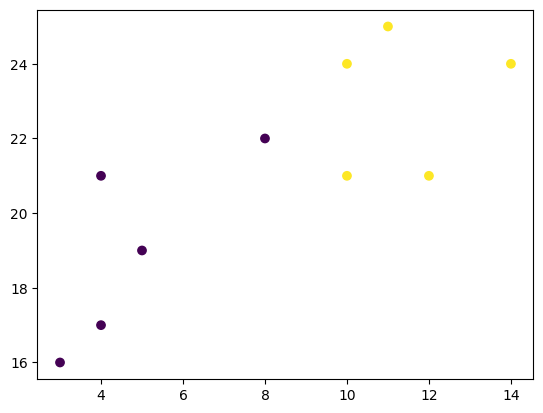

预测类别： [0]


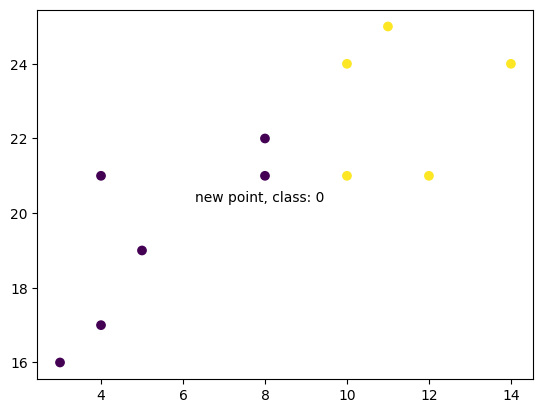

预测类别： [1]


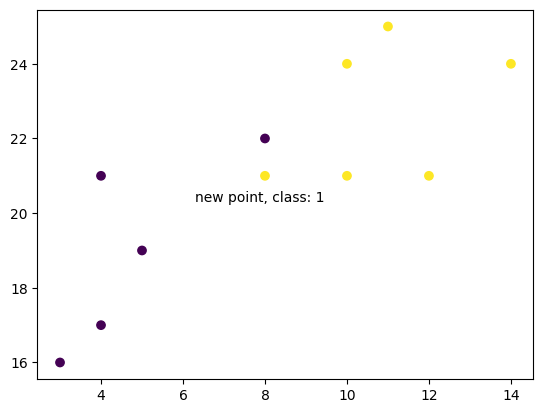

In [100]:
import matplotlib.pyplot as plt

# 为了方便画图，只用了两个输入特征x和y，但此方法适用任意数量的输入特征
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# c参数指定数据点的所属类别
plt.scatter(x, y, c=classes)
plt.show()

# K = 1拟合KNN算法
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))

# n_neighbors设置要找的最近邻居数量
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

# 预测一个新的数据点属于哪个类别
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)
print("预测类别：", prediction)
# 将新点画在图上
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

# 使用K = 5，看看会怎样
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print("预测类别：", prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()